# Merging Dataframes


In [1]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Name,Item Purchased,Cost
Store 1,Chris,Sponge,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Filip,Spoon,5.0


In [2]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Name,Item Purchased,Cost,Date
Store 1,Chris,Sponge,22.5,December 1
Store 1,Kevyn,Kitty Litter,2.5,January 1
Store 2,Filip,Spoon,5.0,mid-May


In [3]:
df['Delivered'] = True
df

,Name,Item Purchased,Cost,Date,Delivered
Store 1,Chris,Sponge,22.5,December 1,True
Store 1,Kevyn,Kitty Litter,2.5,January 1,True
Store 2,Filip,Spoon,5.0,mid-May,True


In [4]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Name,Item Purchased,Cost,Date,Delivered,Feedback
Store 1,Chris,Sponge,22.5,December 1,True,Positive
Store 1,Kevyn,Kitty Litter,2.5,January 1,True,None
Store 2,Filip,Spoon,5.0,mid-May,True,Negative


In [5]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Name,Item Purchased,Cost,Date,Delivered,Feedback
0,Store 1,Chris,Sponge,22.5,December 1,True,Positive
1,Store 1,Kevyn,Kitty Litter,2.5,NaN,True,None
2,Store 2,Filip,Spoon,5.0,mid-May,True,Negative


In [6]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [7]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [8]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [9]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [10]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [11]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [12]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


In [13]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# Scales

In [20]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [21]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [24]:
df['Grades'] > 'C'

excellent    False
excellent    False
excellent    False
good         False
good         False
good         False
ok            True
ok           False
ok            True
poor          True
poor          True
Name: Grades, dtype: bool

# Date Functionality in Pandas

In [25]:
import pandas as pd
import numpy as np

### Timestamp

In [26]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [27]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [28]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [29]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [30]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### PeriodIndex

In [31]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [32]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### Converting to Datetime

In [33]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,31,22
"Aug 29, 2014",70,69
2015-06-26,95,68
7/12/16,40,68


In [34]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,31,22
2014-08-29,70,69
2015-06-26,95,68
2016-07-12,40,68


In [35]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [36]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [37]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [38]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [39]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,101,119
2016-10-16,107,118
2016-10-30,114,115
2016-11-13,110,119
2016-11-27,113,124
2016-12-11,115,121
2016-12-25,121,125
2017-01-08,120,126
2017-01-22,125,129


In [41]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,6.0,-1.0
2016-10-30,7.0,-3.0
2016-11-13,-4.0,4.0
2016-11-27,3.0,5.0
2016-12-11,2.0,-3.0
2016-12-25,6.0,4.0
2017-01-08,-1.0,1.0
2017-01-22,5.0,3.0


In [42]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,107.333333,117.333333
2016-11-30,111.500000,121.500000
2016-12-31,118.000000,123.000000
2017-01-31,122.500000,127.500000


In [43]:
df['2017']

,Count 1,Count 2
2017-01-08,120,126
2017-01-22,125,129


In [44]:
df['2016-12']

,Count 1,Count 2
2016-12-11,115,121
2016-12-25,121,125


In [45]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,115,121
2016-12-25,121,125
2017-01-08,120,126
2017-01-22,125,129


In [46]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,101,119
2016-10-09,101,119
2016-10-16,107,118
2016-10-23,107,118
2016-10-30,114,115
2016-11-06,114,115
2016-11-13,110,119
2016-11-20,110,119
2016-11-27,113,124
2016-12-04,113,124


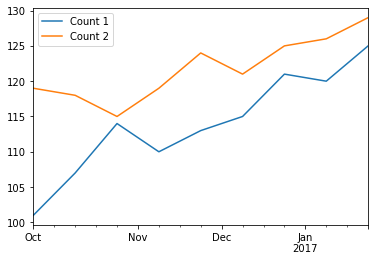

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()